# capstone project - "Finding a good Neighborhood for opening a bar in Cologne, Germany"

import libraries

In [317]:
#important libraries needed
import pandas as pd
pd.set_option('display.max_columns', None) #display.max_columns : int-  If max_cols is exceeded
#switch to truncate view. Depending on large_repr, objects are either centrally truncated or 
#printed as a summary view. ‘None’ value means unlimited.
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
from IPython.display import Image 
from IPython.core.display import HTML 
import folium 
print('Libraries imported.')

Libraries imported.


create credentials

In [39]:
CLIENT_ID = 'ZVPMMYHQIZH40NK23MHNIW1LMRXDJYFIQIFPQD5WMNSJQF05' # your Foursquare ID
CLIENT_SECRET = 'GII3UPXA22M1VJTAR5W3TZHQBOEVMMXZHXTWLAO10TU3VQXE' # your Foursquare Secret
VERSION = 20181217 #date
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZVPMMYHQIZH40NK23MHNIW1LMRXDJYFIQIFPQD5WMNSJQF05
CLIENT_SECRET:GII3UPXA22M1VJTAR5W3TZHQBOEVMMXZHXTWLAO10TU3VQXE


#### get the data for the age-groups per Neighborhood

In [318]:
url = "stadtteile_alter14.xlsx"
import xlrd
df_alter = pd.read_excel(url)

change to englih column names

In [319]:
df_alter.rename(columns={'Stadtteil':'Neighborhood', 'Einwohner insgesamt':'citizens total', '80 und Ã¤lter':'80 and above'}, inplace=True)

In [320]:
df_alter.head()

,Nr.,Neighborhood,citizens total,0-2,3-5,6-14,15-17,18-20,21-34,35-59,60-64,65-74,75-79,80 and above
0,101,Altstadt-SÃ¼d,27571,517,423,961,364,662,9222,9693,1236,2240,1062,1191
1,102,Neustadt-SÃ¼d,38262,1018,767,1654,507,1021,13821,13914,1487,2247,891,935
2,103,Altstadt-Nord,17896,338,226,526,177,449,6050,6545,731,1310,593,951
3,104,Neustadt-Nord,28206,768,573,1183,364,538,8210,11427,1306,2196,852,789
4,105,Deutz,15153,377,305,703,248,438,4408,5530,628,1222,615,679


select Columns needed

In [321]:
filtered_columns = ['Neighborhood', 'citizens total', '18-20', '21-34']
df_alter_f = df_alter.loc[:, filtered_columns]

In [322]:
df_alter_f.head()

,Neighborhood,citizens total,18-20,21-34
0,Altstadt-SÃ¼d,27571,662,9222
1,Neustadt-SÃ¼d,38262,1021,13821
2,Altstadt-Nord,17896,449,6050
3,Neustadt-Nord,28206,538,8210
4,Deutz,15153,438,4408


calculate percentages of the agegroup 18-34

In [323]:
df_alter_f["18-34"] = df_alter_f["18-20"] + df_alter_f["21-34"] 

In [324]:
df_alter_f["percentage 18-34"] = df_alter_f["18-34"]/ df_alter_f["citizens total"] * 100

In [325]:
df_alter_f.head()

,Neighborhood,citizens total,18-20,21-34,18-34,percentage 18-34
0,Altstadt-SÃ¼d,27571,662,9222,9884,35.849262
1,Neustadt-SÃ¼d,38262,1021,13821,14842,38.790445
2,Altstadt-Nord,17896,449,6050,6499,36.315378
3,Neustadt-Nord,28206,538,8210,8748,31.014678
4,Deutz,15153,438,4408,4846,31.980466


### get the data for population density per neighborhood

In [326]:
url = "stadtteile_dichte14.xlsx"
df_dichte = pd.read_excel(url)

In [327]:
df_dichte.head()

,Nr.,Stadtteil,StadtflÃ¤che in Quadratkilometer,ErholungsflÃ¤chenanteil in %,Einwohner je Quadratkilometer,Einwohner insgesamt,Einwohner mit Hauptwohnung,Einwohner mit Nebenwohnung
0,101,Altstadt-SÃ¼d,2.36,4.4,11678,27571,27148,423
1,102,Neustadt-SÃ¼d,2.82,16.2,13552,38262,37715,547
2,103,Altstadt-Nord,2.46,3.0,7287,17896,17482,414
3,104,Neustadt-Nord,3.49,24.0,8084,28206,27708,498
4,105,Deutz,5.24,15.0,2892,15153,14966,187


rename columns to englisch and select needet columns

In [328]:
df_dichte.rename(columns={'Stadtteil':'Neighborhood', 'Einwohner je Quadratkilometer':'citizens per square kilometers'}, inplace=True)

In [329]:
fil_col = ['Neighborhood', 'citizens per square kilometers']
df_dichte_f = df_dichte.loc[:, fil_col]

In [330]:
df_dichte_f.head()

,Neighborhood,citizens per square kilometers
0,Altstadt-SÃ¼d,11678
1,Neustadt-SÃ¼d,13552
2,Altstadt-Nord,7287
3,Neustadt-Nord,8084
4,Deutz,2892


### join the two datasets

In [331]:
df_final = df_alter_f.join(df_dichte_f.set_index('Neighborhood'), on='Neighborhood')

In [332]:
df_final["percentage 18-34"] = df_final["percentage 18-34"].round(decimals=2)

In [333]:
df_final.head()

,Neighborhood,citizens total,18-20,21-34,18-34,percentage 18-34,citizens per square kilometers
0,Altstadt-SÃ¼d,27571,662,9222,9884,35.85,11678.0
1,Neustadt-SÃ¼d,38262,1021,13821,14842,38.79,13552.0
2,Altstadt-Nord,17896,449,6050,6499,36.32,7287.0
3,Neustadt-Nord,28206,538,8210,8748,31.01,8084.0
4,Deutz,15153,438,4408,4846,31.98,2892.0


change to readable strings

In [334]:
df_final["Neighborhood"] = df_final.Neighborhood.str.replace("Ã¼", "ü")
df_final["Neighborhood"] = df_final.Neighborhood.str.replace("ÃŸ", "ß")
df_final["Neighborhood"] = df_final.Neighborhood.str.replace("Ã¶", "ö") 

In [335]:
df_final.head()

,Neighborhood,citizens total,18-20,21-34,18-34,percentage 18-34,citizens per square kilometers
0,Altstadt-Süd,27571,662,9222,9884,35.85,11678.0
1,Neustadt-Süd,38262,1021,13821,14842,38.79,13552.0
2,Altstadt-Nord,17896,449,6050,6499,36.32,7287.0
3,Neustadt-Nord,28206,538,8210,8748,31.01,8084.0
4,Deutz,15153,438,4408,4846,31.98,2892.0


drop 3 entries with NAN

In [336]:
df = df_final.dropna()

In [337]:
df.shape

(83, 7)

save the final dataframe to csv-file

In [338]:
df.to_csv("Dataframe_cologne.csv", index = False)

### get longitude and latitude datea

In [374]:
url = "Dataframe_cologne.csv"
df_latlon = pd.read_csv(url)

In [375]:
df_latlon.head()

,Neighborhood,citizens total,18-20,21-34,18-34,percentage 18-34,citizens per square kilometers
0,Altstadt-Süd,27571,662,9222,9884,35.85,11678.0
1,Neustadt-Süd,38262,1021,13821,14842,38.79,13552.0
2,Altstadt-Nord,17896,449,6050,6499,36.32,7287.0
3,Neustadt-Nord,28206,538,8210,8748,31.01,8084.0
4,Deutz,15153,438,4408,4846,31.98,2892.0


get the lon + lat data

In [378]:
latitude = list()
longitude = list()
from geopy.point import Point
bbox = [Point(50.8304494,6.7725303),Point(51.0849743,7.162028)]

for index, row in df.iterrows():
    try:
        address = '{}, Köln, Deutschland'.format(row["Neighborhood"])
        geolocator = Nominatim(user_agent="test-app",view_box=bbox,bounded=True) 
        location = geolocator.geocode(address)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        print(row["Neighborhood"], "None-object has no lat/lon")
        

add the lat and lon data to the dataframe

In [379]:
lat = pd.DataFrame(latitude) 
lon = pd.DataFrame(longitude) 
df_latlon = df.assign(lat=lat.values)
df_latlon = df.assign(lon=lon.values)

In [380]:
df_latlon.head()

,Neighborhood,citizens total,18-20,21-34,18-34,percentage 18-34,citizens per square kilometers,lat,lon
0,Altstadt-Süd,27571,662,9222,9884,35.85,11678.0,50.929181,6.955329
1,Neustadt-Süd,38262,1021,13821,14842,38.79,13552.0,50.926560,6.940406
2,Altstadt-Nord,17896,449,6050,6499,36.32,7287.0,50.942265,6.953188
3,Neustadt-Nord,28206,538,8210,8748,31.01,8084.0,50.947906,6.941059
4,Deutz,15153,438,4408,4846,31.98,2892.0,50.936759,6.973046


In [381]:
df_latlon_short = df_latlon.drop(['citizens total','18-20','21-34','18-34','lat', 'lon'], axis=1)

In [382]:
df_latlon_short.head()

,Neighborhood,percentage 18-34,citizens per square kilometers
0,Altstadt-Süd,35.85,11678.0
1,Neustadt-Süd,38.79,13552.0
2,Altstadt-Nord,36.32,7287.0
3,Neustadt-Nord,31.01,8084.0
4,Deutz,31.98,2892.0


In [383]:
df_latlon_short.to_csv("Dataframe_cologne_latlan.csv", index = False)

### show map of cologne and the neighborhoods

In [350]:
url = "Dataframe_cologne_latlan.csv"
df_latlon = pd.read_csv(url)

In [351]:
address = 'köln, Deutschland'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_k = location.latitude
longitude_k = location.longitude
print('The geograpical coordinate of Köln are {}, {}.'.format(latitude_k, longitude_k))

The geograpical coordinate of Köln are 50.938361, 6.959974.


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


In [352]:
map_köln= folium.Map(location=[latitude_k, longitude_k], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_latlon['lat'], df_latlon['lon'], df_latlon['Neighborhood']):
  #  label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_köln)  
    
map_köln

### get the nearby venues of all the neighborhoods

In [353]:
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood lat', 
                  'Neighborhood lon', 
                  'Venue',
                  'ID',
                  'Venue lat', 
                  'Venue lon', 
                  'Venue Category']
    
    return(nearby_venues)

In [354]:
köln_venues = getNearbyVenues(names=df_latlon['Neighborhood'],
                                   latitudes=df_latlon['lat'],
                                   longitudes=df_latlon['lon']
                                  )

Altstadt-Süd
Neustadt-Süd
Altstadt-Nord
Neustadt-Nord
Deutz
Bayenthal
Marienburg
Raderberg
Raderthal
Zollstock
Rondorf
Hahnwald
Rodenkirchen
Weiß
Sürth
Godorf
Immendorf
Meschenich
Klettenberg
Sülz
Lindenthal
Braunsfeld
Müngersdorf
Junkersdorf
Weiden
Lövenich
Widdersdorf
Ehrenfeld
Neuehrenfeld
Bickendorf
Vogelsang
Ossendorf
Nippes
Mauenheim
Riehl
Niehl
Weidenpesch
Longerich
Bilderstöckchen
Merkenich
Fühlingen
Seeberg
Heimersdorf
Lindweiler
Pesch
Esch/Auweiler
Volkhoven/Weiler
Chorweiler
Blumenberg
Worringen
Poll
Westhoven
Ensen
Gremberghoven
Eil
Porz
Urbach
Elsdorf
Grengel
Wahnheide
Wahn
Lind
Libur
Zündorf
Langel
Finkenberg
Kalk
Vingst
Höhenberg
Ostheim
Merheim
Brück
Rath/Heumar
Neubrück
Mülheim
Buchforst
Buchheim
Holweide
Dellbrück
Höhenhaus
Dünnwald
Stammheim
Flittard


In [355]:
print("There are {} venues in the listed neighbourhoods of Köln.".format(köln_venues.shape[0])) # anzahl der zeilen = gefundene venues in allen stadtteilen

There are 1208 venues in the listed neighbourhoods of Köln.


In [356]:
köln_venues.head()

,Neighborhood,Neighborhood lat,Neighborhood lon,Venue,ID,Venue lat,Venue lon,Venue Category
0,Altstadt-Süd,50.929181,6.955329,Holiday Inn Express,5922a6d84c954c04e9bcb25d,50.930371,6.953661,Hotel
1,Altstadt-Süd,50.929181,6.955329,Motel One Köln-Waidmarkt,50c5f2ca067dc772ebcc0328,50.931557,6.954513,Hotel
2,Altstadt-Süd,50.929181,6.955329,Toscanini,4b464b72f964a520cf1c26e3,50.925644,6.957099,Italian Restaurant
3,Altstadt-Süd,50.929181,6.955329,Severin's Kebap Haus,4f565504e4b07893e1d17340,50.928267,6.957587,Turkish Restaurant
4,Altstadt-Süd,50.929181,6.955329,Motel One Lounge,50b9c85ce4b0c78357e050fb,50.931571,6.954438,Lounge


### select only the venues that contain the worls bar or pub

In [357]:
import re
df_n = köln_venues[köln_venues['Venue Category'].str.contains('bar|pub', flags=re.IGNORECASE, regex=True)].reset_index(drop=True) 

rename the columns venue categories to bar/pub

In [358]:
df_n.rename(columns={'Venue Category':'Bar/Pub'}, inplace=True)

In [510]:
df_n

,Neighborhood,Neighborhood lat,Neighborhood lon,Venue,ID,Venue lat,Venue lon,Bar/Pub
0,Altstadt-Süd,50.929181,6.955329,Em Tresörche,4e0f859cd22d8582bdc9c18f,50.925036,6.958212,Bar
1,Neustadt-Süd,50.926560,6.940406,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar
2,Neustadt-Süd,50.926560,6.940406,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar
3,Neustadt-Süd,50.926560,6.940406,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar
4,Neustadt-Süd,50.926560,6.940406,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar
5,Neustadt-Süd,50.926560,6.940406,Soul Bar,4dcda89552b1f8915b82f8ad,50.929126,6.937328,Cocktail Bar
6,Neustadt-Süd,50.926560,6.940406,Metronom,4b06b601f964a520edee22e3,50.930383,6.943511,Pub
7,Neustadt-Süd,50.926560,6.940406,Manni's Rästorang,4cc34ab2c844721ea243e201,50.928991,6.939622,Gastropub
8,Neustadt-Süd,50.926560,6.940406,Stiefel,4b05886bf964a520b2c422e3,50.929893,6.938389,Pub
9,Neustadt-Süd,50.926560,6.940406,Shepheard,4b183fbef964a5208fcf23e3,50.930733,6.937338,Cocktail Bar


In [360]:
df_n.groupby("Venue").size()

Venue
"L"                                   1
Acephale                              1
Alt Neppes                            1
Alte Schmiede                         1
Bar Celos                             1
Barfly                                1
Barney Vallely's                      1
Basil‘s                               1
Bei Lena                              1
Bei Uns                               1
Berrenrather                          1
Bumann & Sohn                         1
Die Kunstbar                          1
Die Vitamin-Oase                      1
Die hängenden Gärten von Ehrenfeld    1
Divas                                 1
Ehrenfeldbar                          1
Eigenheim                             1
El Habab                              1
Em Tresörche                          1
Flotte                                1
Frooters                              1
Früh im Höfchen                       1
Gasthaus Linde                        1
Gaststätte Lommerzheim            

get rid of the gastropubs

In [511]:
df_n_neu = df_n[df_n["Bar/Pub"]!= 'Gastropub'].reset_index(drop=True)

In [520]:
df_n_neu.count()

Neighborhood        50
Neighborhood lat    50
Neighborhood lon    50
Venue               50
ID                  50
Venue lat           50
Venue lon           50
Bar/Pub             50
dtype: int64

#### show tha bars of cologne

In [513]:
map_köln= folium.Map(location=[latitude_k, longitude_k], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_n_neu['Venue lat'], df_n_neu['Venue lon'], df_n_neu['Venue']):
  #  label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_köln)  
    
map_köln

 save dataframe

In [521]:
df_n_neu.to_csv("Dataframe_cologne_bars.csv", index = False)

merge df_short mit df_n

In [522]:
df_merge = df_n_neu.join(df_short.set_index('Neighborhood'), on='Neighborhood', lsuffix ="_df_n")

In [524]:
df_merge.head()

,Neighborhood,Neighborhood lat,Neighborhood lon,Venue,ID,Venue lat,Venue lon,Bar/Pub,percentage 18-34,citizens per square kilometers
0,Altstadt-Süd,50.929181,6.955329,Em Tresörche,4e0f859cd22d8582bdc9c18f,50.925036,6.958212,Bar,35.85,11678.0
1,Neustadt-Süd,50.926560,6.940406,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,38.79,13552.0
2,Neustadt-Süd,50.926560,6.940406,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,38.79,13552.0
3,Neustadt-Süd,50.926560,6.940406,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,38.79,13552.0
4,Neustadt-Süd,50.926560,6.940406,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,38.79,13552.0


drop not important columns

In [526]:
df_merge.drop(['Neighborhood lat','Neighborhood lon'], axis=1, inplace=True)

create new dataframe with bar-count for each neighborhood

In [527]:
df_bars = df_n.groupby(["Neighborhood"])[['Bar/Pub']].count().reset_index()

In [528]:
df_bars

,Neighborhood,Bar/Pub
0,Altstadt-Nord,8
1,Altstadt-Süd,1
2,Bickendorf,1
3,Dellbrück,1
4,Deutz,3
5,Ehrenfeld,9
6,Höhenberg,1
7,Klettenberg,1
8,Libur,1
9,Longerich,1


merge df_bars und df_merge (add bar count to df_merge)

In [529]:
df_merge2 = df_merge.join(df_bars.set_index('Neighborhood'), on='Neighborhood', lsuffix ="_df_merge")

In [530]:
df_merge2.head(10)

,Neighborhood,Venue,ID,Venue lat,Venue lon,Bar/Pub_df_merge,percentage 18-34,citizens per square kilometers,Bar/Pub
0,Altstadt-Süd,Em Tresörche,4e0f859cd22d8582bdc9c18f,50.925036,6.958212,Bar,35.85,11678.0,1
1,Neustadt-Süd,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,38.79,13552.0,13
2,Neustadt-Süd,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,38.79,13552.0,13
3,Neustadt-Süd,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,38.79,13552.0,13
4,Neustadt-Süd,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,38.79,13552.0,13
5,Neustadt-Süd,Soul Bar,4dcda89552b1f8915b82f8ad,50.929126,6.937328,Cocktail Bar,38.79,13552.0,13
6,Neustadt-Süd,Metronom,4b06b601f964a520edee22e3,50.930383,6.943511,Pub,38.79,13552.0,13
7,Neustadt-Süd,Stiefel,4b05886bf964a520b2c422e3,50.929893,6.938389,Pub,38.79,13552.0,13
8,Neustadt-Süd,Shepheard,4b183fbef964a5208fcf23e3,50.930733,6.937338,Cocktail Bar,38.79,13552.0,13
9,Neustadt-Süd,Tankstelle,4b4e2e6ef964a52058e426e3,50.928834,6.939524,Pub,38.79,13552.0,13


In [531]:
df_merge2.rename(columns={'Bar/Pub_df_merge':'Name of Bar/Pub', 'Bar/Pub':'Bar/Pup Count'}, inplace=True)

In [532]:
df_merge2.head()

,Neighborhood,Venue,ID,Venue lat,Venue lon,Name of Bar/Pub,percentage 18-34,citizens per square kilometers,Bar/Pup Count
0,Altstadt-Süd,Em Tresörche,4e0f859cd22d8582bdc9c18f,50.925036,6.958212,Bar,35.85,11678.0,1
1,Neustadt-Süd,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,38.79,13552.0,13
2,Neustadt-Süd,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,38.79,13552.0,13
3,Neustadt-Süd,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,38.79,13552.0,13
4,Neustadt-Süd,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,38.79,13552.0,13


create a new tabel eith tip-counts with foursquare API

In [533]:
check=[]
for index, row in df_merge2.iterrows():
    if index <= 40:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(row["ID"], CLIENT_ID, CLIENT_SECRET, VERSION)
        results = requests.get(url).json()["response"]
        check.append(results["venue"]["id"])
        check.append(results["venue"]["stats"]["tipCount"])        

In [534]:
CLIENT_ID = 'SBKVE4HAHWDBJFQGDLETQIZC0KM34YGH1BD0AFCVM52HQHFP' # your Foursquare ID
CLIENT_SECRET = 'YMJBKBXLPDLEIDIVHFB0EAKX0TJIO24O540AO0YR3P1Q3UBX' # your Foursquare Secret
for index, row in df_merge2.iterrows():
    if index > 40:
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(row["ID"], CLIENT_ID, CLIENT_SECRET, VERSION)
        results = requests.get(url).json()["response"]
        check.append(results["venue"]["id"])
        check.append(results["venue"]["stats"]["tipCount"])   

In [535]:
check

['4e0f859cd22d8582bdc9c18f',
 5,
 '4b05886af964a52066c422e3',
 10,
 '5593146a498ebeb40755d43e',
 1,
 '4b50c41cf964a5207e3127e3',
 9,
 '4bf855be4a67c928453e25cf',
 25,
 '4dcda89552b1f8915b82f8ad',
 21,
 '4b06b601f964a520edee22e3',
 12,
 '4b05886bf964a520b2c422e3',
 16,
 '4b183fbef964a5208fcf23e3',
 39,
 '4b4e2e6ef964a52058e426e3',
 9,
 '4b88d965f964a520531032e3',
 7,
 '4b05886bf964a520a7c422e3',
 5,
 '4e177a9aae6092c2764892fc',
 6,
 '51921bf7498e6750b2f7dccb',
 8,
 '52446eb011d22c301ecd2444',
 2,
 '5827800b7d93993366e2a1d5',
 4,
 '4cb9a036dd41a35d2cb5e2a0',
 3,
 '4b094ca5f964a520621523e3',
 8,
 '53de115a498e81514d02860e',
 2,
 '4ce6fc83ae8e5941e6160f4c',
 4,
 '4b05886cf964a520cec422e3',
 6,
 '4b05886bf964a52086c422e3',
 7,
 '4a172db1f964a52039791fe3',
 6,
 '4b05886bf964a520bbc422e3',
 2,
 '506b4d15498e0be8f1cf7781',
 7,
 '5186b4a4498e67377267a64e',
 2,
 '5adf5788da5e562860c3891d',
 0,
 '4c11251e6b7e2d7f72c62835',
 9,
 '4d7a762ffed6a093731ea356',
 0,
 '4b05886af964a5204dc422e3',
 13,
 '4

In [536]:
list_id = check[0::2]

In [537]:
list_tips = check[1::2]

In [538]:
df_tipcount = {"ID":list_id, "Tip-Count":list_tips} 

In [539]:
df_tipcount = pd.DataFrame(df_tipcount)

In [540]:
df_tipcount.head()

,ID,Tip-Count
0,4e0f859cd22d8582bdc9c18f,5
1,4b05886af964a52066c422e3,10
2,5593146a498ebeb40755d43e,1
3,4b50c41cf964a5207e3127e3,9
4,4bf855be4a67c928453e25cf,25


add df_tipcount to df_merge2

In [541]:
df_reg = df_merge2.join(df_tipcount.set_index('ID'), on='ID', lsuffix ="_df_merge2")

In [543]:
df_reg.head()

,Neighborhood,Venue,ID,Venue lat,Venue lon,Name of Bar/Pub,percentage 18-34,citizens per square kilometers,Bar/Pup Count,Tip-Count
0,Altstadt-Süd,Em Tresörche,4e0f859cd22d8582bdc9c18f,50.925036,6.958212,Bar,35.85,11678.0,1,5
1,Neustadt-Süd,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,38.79,13552.0,13,10
2,Neustadt-Süd,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,38.79,13552.0,13,1
3,Neustadt-Süd,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,38.79,13552.0,13,9
4,Neustadt-Süd,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,38.79,13552.0,13,25


In [544]:
df_reg_short = df_reg.drop(['ID','Venue lat','Venue lon'], axis=1) 

In [545]:
df_reg_short.head(10)

,Neighborhood,Venue,Name of Bar/Pub,percentage 18-34,citizens per square kilometers,Bar/Pup Count,Tip-Count
0,Altstadt-Süd,Em Tresörche,Bar,35.85,11678.0,1,5
1,Neustadt-Süd,Stereo Wonderland,Bar,38.79,13552.0,13,10
2,Neustadt-Süd,Acephale,Bar,38.79,13552.0,13,1
3,Neustadt-Süd,Zwoeinz,Bar,38.79,13552.0,13,9
4,Neustadt-Süd,Roter Platz,Bar,38.79,13552.0,13,25
5,Neustadt-Süd,Soul Bar,Cocktail Bar,38.79,13552.0,13,21
6,Neustadt-Süd,Metronom,Pub,38.79,13552.0,13,12
7,Neustadt-Süd,Stiefel,Pub,38.79,13552.0,13,16
8,Neustadt-Süd,Shepheard,Cocktail Bar,38.79,13552.0,13,39
9,Neustadt-Süd,Tankstelle,Pub,38.79,13552.0,13,9


save dataframe

In [546]:
df_reg.to_csv("Dataframe_regression.csv", index = False)

In [547]:
df_reg_neu = pd.read_csv("Dataframe_regression.csv")

In [548]:
df_reg_neu.dtypes

Neighborhood                       object
Venue                              object
ID                                 object
Venue lat                         float64
Venue lon                         float64
Name of Bar/Pub                    object
percentage 18-34                  float64
citizens per square kilometers    float64
Bar/Pup Count                       int64
Tip-Count                           int64
dtype: object

### Correlation

In [433]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_reg_neu["percentage 18-34"], df_reg_neu["Tip-Count"])
print(pearson_coef)
print(p_value)

0.4017928980234485
0.0028625506283124318


In [434]:
pearson_coef, p_value = stats.pearsonr(df_reg_neu["citizens per square kilometers"], df_reg_neu["Tip-Count"])
print(pearson_coef)
print(p_value)

0.5171351870905783
7.343827678317685e-05


In [435]:
pearson_coef, p_value = stats.pearsonr(df_reg_neu["Bar/Pup Count"], df_reg_neu["Tip-Count"])
print(pearson_coef)
print(p_value)

0.525002053324871
5.438443019424349e-05


In [436]:
pearson_coef, p_value = stats.pearsonr(df_reg_neu["Bar/Pup Count"], df_reg_neu["citizens per square kilometers"])
print(pearson_coef)
print(p_value)

0.766425014743408
2.2478759246617955e-11


In [437]:
pearson_coef, p_value = stats.pearsonr(df_reg_neu["Bar/Pup Count"], df_reg_neu["percentage 18-34"])
print(pearson_coef)
print(p_value)

0.7403650445582249
2.3585766573365863e-10


In [438]:
pearson_coef, p_value = stats.pearsonr(df_reg_neu["citizens per square kilometers"], df_reg_neu["percentage 18-34"])
print(pearson_coef)
print(p_value)

0.4867328770411706
0.00021932911888641567


### Regression

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

standardize data

In [285]:
df_reg_neu["percentage 18-34"] = (df_reg_neu["percentage 18-34"]- df_reg_neu["percentage 18-34"].mean()) / df_reg_neu["percentage 18-34"].std()
df_reg_neu["citizens per square kilometers"] = (df_reg_neu["citizens per square kilometers"]- df_reg_neu["citizens per square kilometers"].mean()) / df_reg_neu["citizens per square kilometers"].std()
df_reg_neu["Bar/Pup Count"] = (df_reg_neu["Bar/Pup Count"]- df_reg_neu["Bar/Pup Count"].mean()) / df_reg_neu["Bar/Pup Count"].std()
df_reg_neu["Tip-Count"] = (df_reg_neu["Tip-Count"]- df_reg_neu["Tip-Count"].mean()) / df_reg_neu["Tip-Count"].std()

In [440]:
df_reg_neu.head()

,Neighborhood,Venue,ID,Venue lat,Venue lon,Name of Bar/Pub,percentage 18-34,citizens per square kilometers,Bar/Pup Count,Tip-Count
0,Neustadt-Süd,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,1.105067,1.312234,1.515271,0.425457
1,Neustadt-Süd,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,1.105067,1.312234,1.515271,-0.593581
2,Neustadt-Süd,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,1.105067,1.312234,1.515271,0.312230
3,Neustadt-Süd,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,1.105067,1.312234,1.515271,2.123852
4,Neustadt-Süd,Soul Bar,4dcda89552b1f8915b82f8ad,50.929126,6.937328,Cocktail Bar,1.105067,1.312234,1.515271,1.670946


In [422]:
df_reg_neu = df_reg[df_reg["Name of Bar/Pub"]!= 'Gastropub'].reset_index(drop=True) 

In [508]:
df_reg_neu.head(10)

,Neighborhood,Venue,ID,Venue lat,Venue lon,Name of Bar/Pub,percentage 18-34,citizens per square kilometers,Bar/Pup Count,Tip-Count
0,Neustadt-Süd,Stereo Wonderland,4b05886af964a52066c422e3,50.927526,6.939967,Bar,1.105067,1.312234,1.515271,0.425457
1,Neustadt-Süd,Acephale,5593146a498ebeb40755d43e,50.926391,6.938786,Bar,1.105067,1.312234,1.515271,-0.593581
2,Neustadt-Süd,Zwoeinz,4b50c41cf964a5207e3127e3,50.928605,6.939540,Bar,1.105067,1.312234,1.515271,0.312230
3,Neustadt-Süd,Roter Platz,4bf855be4a67c928453e25cf,50.929858,6.939570,Bar,1.105067,1.312234,1.515271,2.123852
4,Neustadt-Süd,Soul Bar,4dcda89552b1f8915b82f8ad,50.929126,6.937328,Cocktail Bar,1.105067,1.312234,1.515271,1.670946
5,Neustadt-Süd,Metronom,4b06b601f964a520edee22e3,50.930383,6.943511,Pub,1.105067,1.312234,1.515271,0.651909
6,Neustadt-Süd,Stiefel,4b05886bf964a520b2c422e3,50.929893,6.938389,Pub,1.105067,1.312234,1.515271,1.104815
7,Neustadt-Süd,Shepheard,4b183fbef964a5208fcf23e3,50.930733,6.937338,Cocktail Bar,1.105067,1.312234,1.515271,3.709021
8,Neustadt-Süd,Tankstelle,4b4e2e6ef964a52058e426e3,50.928834,6.939524,Pub,1.105067,1.312234,1.515271,0.312230
9,Neustadt-Süd,Trierer Eck,4b88d965f964a520531032e3,50.927744,6.945447,Pub,1.105067,1.312234,1.515271,0.085778


In [424]:
df_reg_neu["Neighborhood"].value_counts()

Neustadt-Süd     12
Ehrenfeld         9
Altstadt-Nord     8
Nippes            7
Neustadt-Nord     2
Deutz             2
Mülheim           2
Buchheim          2
Neuehrenfeld      2
Altstadt-Süd      1
Raderberg         1
Bickendorf        1
Kalk              1
Lövenich          1
Sülz              1
Höhenberg         1
Name: Neighborhood, dtype: int64

create regressionplot

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 3.9872997577368134)

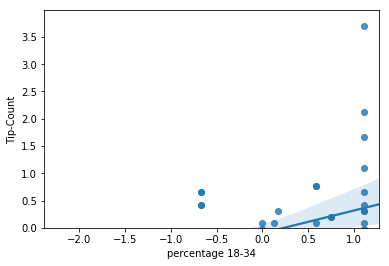

In [425]:
sns.regplot(x="percentage 18-34", y='Tip-Count', data = df_reg_neu) # bsp sns.regplot(x="horsepower", y="price", data = df)
plt.ylim(0,) #ergibt scatterplot und Gerade dadurch


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 3.967301749202858)

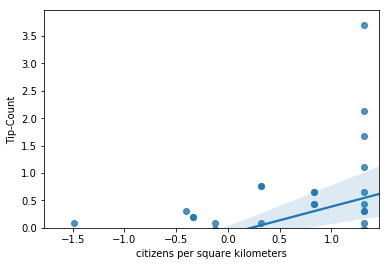

In [426]:
sns.regplot(x='citizens per square kilometers', y='Tip-Count', data = df_reg_neu) # bsp sns.regplot(x="horsepower", y="price", data = df)
plt.ylim(0,) #ergibt scatterplot und Gerade dadurch

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 3.943493320852077)

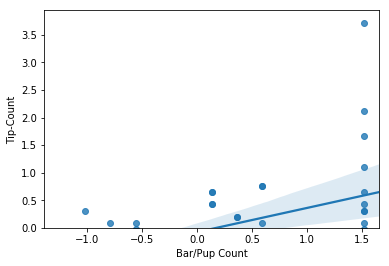

In [427]:
sns.regplot(x="Bar/Pup Count", y='Tip-Count', data = df_reg_neu) # bsp sns.regplot(x="horsepower", y="price", data = df)
plt.ylim(0,) #ergibt scatterplot und Gerade dadurch

create residualplot

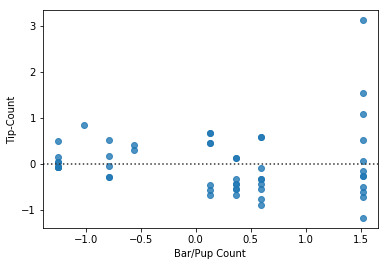

In [428]:
plt.figure()
sns.residplot(df_reg_neu["Bar/Pup Count"], df_reg_neu['Tip-Count'])
plt.show()

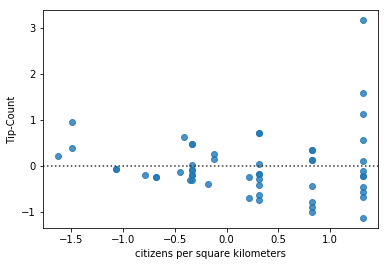

In [430]:
plt.figure()
sns.residplot(df_reg_neu['citizens per square kilometers'], df_reg_neu['Tip-Count'])
plt.show()

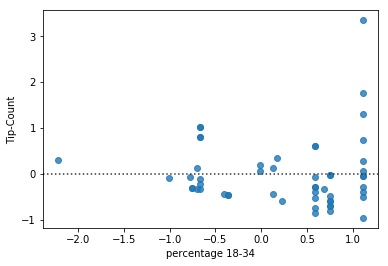

In [432]:
plt.figure()
sns.residplot(df_reg_neu["percentage 18-34"], df_reg_neu['Tip-Count'])
plt.show()

multiple regression

In [441]:
X= df_reg_neu[["percentage 18-34", "citizens per square kilometers", "Bar/Pup Count"]]
y = df_reg_neu['Tip-Count']

find best polynomial for different models

all three dependetn Vn

[0.31044472397820455, 0.36813597094521056, 0.379886380520156, 0.2746974616350818, 0.2763223371030117, 0.2959367629503694, 0.3331827975455387, 0.3524105983111129]


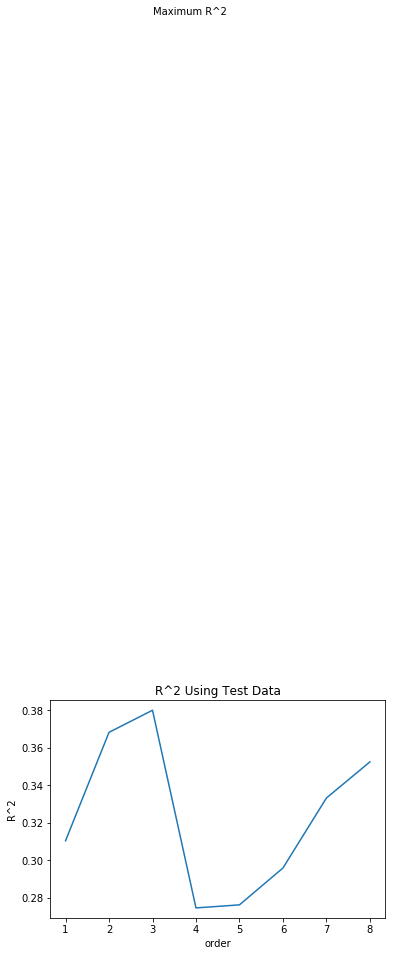

In [468]:
Rsqu=[]
order=[1,2,3,4,5,6,7,8]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_pr=pr.fit_transform(df_reg_neu[["percentage 18-34", "citizens per square kilometers", "Bar/Pup Count"]]) 
    lm.fit(x_pr,y)
    Rsqu.append(lm.score(x_pr,y))
plt.plot(order,Rsqu)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu)

version 2

[0.3075471778898615, 0.3377470185789654, 0.3674208781496817, 0.36704233290601707, 0.3786130224266153, 0.37535931593001404, 0.33598678653363656, 0.3612065714430305]


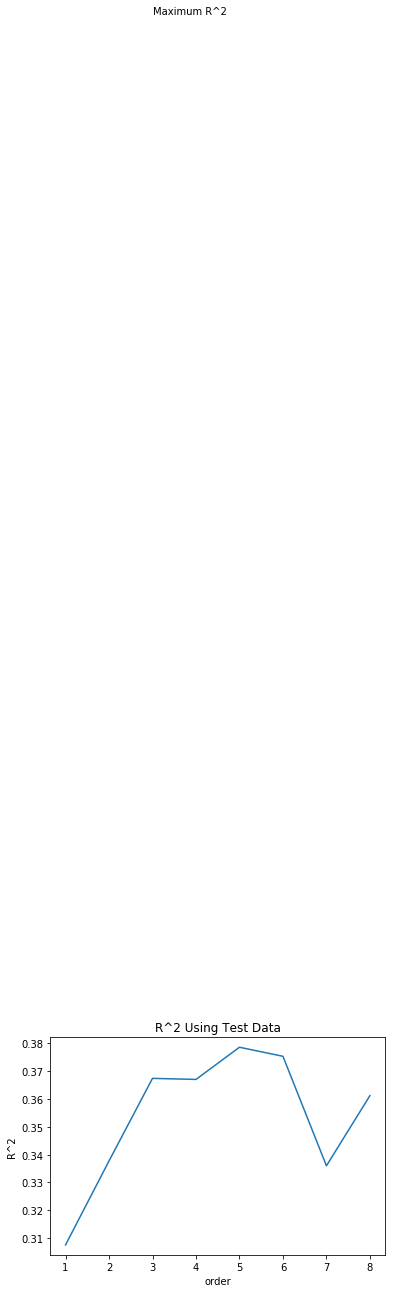

In [447]:
Rsqu=[]
order=[1,2,3,4,5,6,7,8]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_pr=pr.fit_transform(df_reg_neu[["Bar/Pup Count", "citizens per square kilometers"]]) 
    lm.fit(x_pr,y)
    Rsqu.append(lm.score(x_pr,y))
plt.plot(order,Rsqu)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu)

Version 3

[0.27600692641646585, 0.3359197954742711, 0.3698050715715735, 0.3789415817239776, 0.3791955405738042, 0.379886380520156, 0.379886380520156, 0.379886380520156]


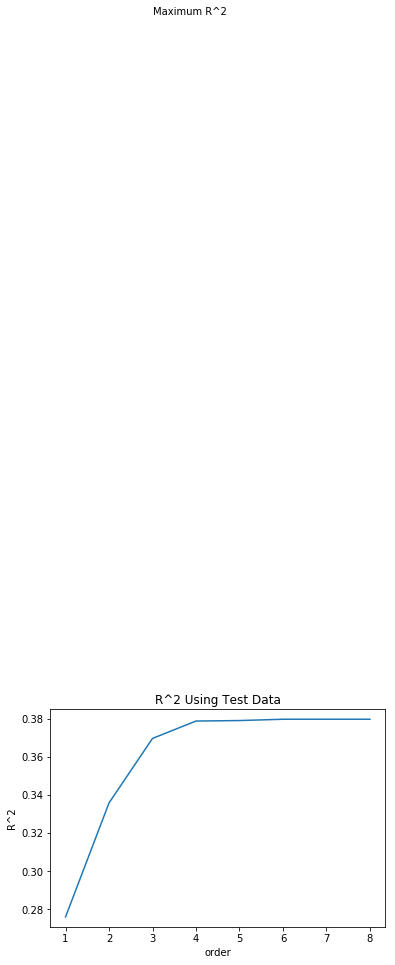

In [449]:
Rsqu=[]
order=[1,2,3,4,5,6,7,8]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_pr=pr.fit_transform(df_reg_neu[["percentage 18-34", "Bar/Pup Count"]]) 
    lm.fit(x_pr,y)
    Rsqu.append(lm.score(x_pr,y))
plt.plot(order,Rsqu)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu)

version 4

[0.2969480392322629, 0.34413159606547017, 0.35228001559846156, 0.36469875231101956, 0.379886380520156, 0.379886380520156, 0.3789680755796657, 0.379886380520156]


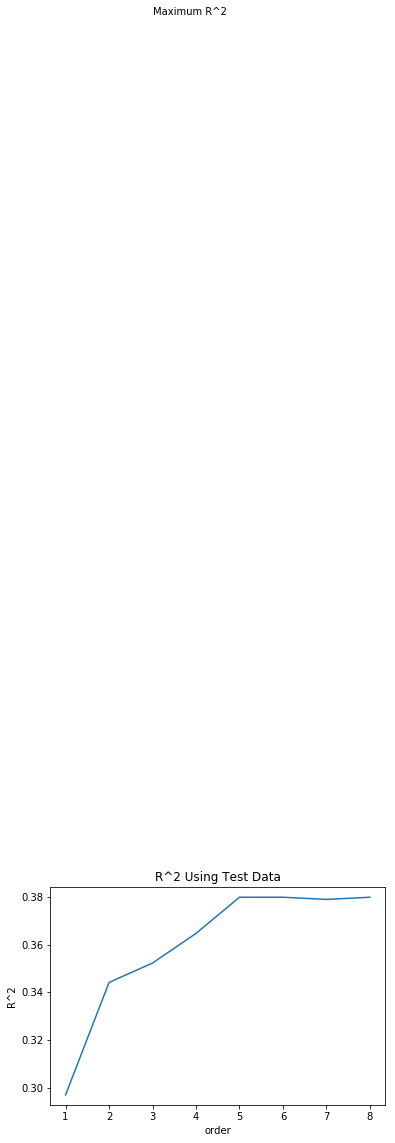

In [450]:
Rsqu=[]
order=[1,2,3,4,5,6,7,8]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_pr=pr.fit_transform(df_reg_neu[["percentage 18-34", "citizens per square kilometers"]]) 
    lm.fit(x_pr,y)
    Rsqu.append(lm.score(x_pr,y))
plt.plot(order,Rsqu)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu)

#### Multiple linear regresssion with "percentage  18-34" and Bar/Pub-Count" as independent Variables 

In [490]:
X= df_reg_neu[["percentage 18-34", "citizens per square kilometers"]]
y = df_reg_neu['Tip-Count']

In [500]:
pr = PolynomialFeatures(degree = 2)
x_pr = pr.fit_transform(X)
mod = sm.OLS(y, x_pr).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Tip-Count   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     4.932
Date:                Wed, 09 Jan 2019   Prob (F-statistic):            0.00104
Time:                        16:54:43   Log-Likelihood:                -52.349
No. Observations:                  53   AIC:                             116.7
Df Residuals:                      47   BIC:                             128.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3165      0.183     -1.734      0.089      -0.684       0.051
x1             0.2093      0.160      1.309      0.197      -0.112       0.531
x2             0.3586      0.134      2.680      0.010       0.089       0.628
x3             0.0099      0.266      0.037      0.970      -0.525       0.544
x4            -0.0400      0.260     -0.154      0.878      -0.562       0.482
x5             0.2598      0.183      1.422      0.162      -0.108       0.627
==============================================================================
Omnibus:                       33.347   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.584
Skew:                           1.671   Prob(JB):                     5.30e-23
Kurtosis:                       8.940   Cond. No.                         7.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


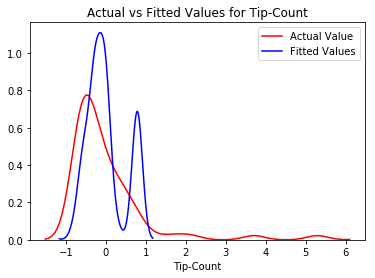

In [501]:
lm.fit(x_pr,y)
Yhat=lm.predict(x_pr)
ax1 = sns.distplot(df_reg['Tip-Count'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Tip-Count')
plt.xlabel('Tip-Count')
plt.ylabel('')
plt.show()

take bar/count out of the regression


### create finalk dataframe

In [398]:
df_final = df_short.join(df_bars.set_index('Neighborhood'), on='Neighborhood')

In [399]:
df_final

,Neighborhood,percentage 18-34,citizens per square kilometers,Bar/Pub
0,Altstadt-Süd,35.85,11678.0,1.0
1,Neustadt-Süd,38.79,13552.0,13.0
2,Altstadt-Nord,36.32,7287.0,8.0
3,Neustadt-Nord,31.01,8084.0,4.0
4,Deutz,31.98,2892.0,3.0
5,Bayenthal,23.28,7073.0,NaN
6,Marienburg,20.83,2039.0,NaN
7,Raderberg,25.63,6863.0,1.0
8,Raderthal,18.16,1491.0,NaN
9,Zollstock,28.74,4435.0,1.0


In [400]:
import numpy as np
df_final.replace(np.nan, "0", inplace = True)
df_final['Bar/Pub'] = df_final['Bar/Pub'].astype('int64')

In [505]:
df_final.quantile(q=0.9)

percentage 18-34                    30.758
citizens per square kilometers    8507.200
Bar/Pub                              1.800
Name: 0.9, dtype: float64

In [506]:
young = df_final['percentage 18-34']>=  30.758
dense = df_final['citizens per square kilometers'] >=  8507.200
df_select = df_final[young & dense]

In [507]:
df_select

,Neighborhood,percentage 18-34,citizens per square kilometers,Bar/Pub
0,Altstadt-Süd,35.85,11678.0,1
1,Neustadt-Süd,38.79,13552.0,13
27,Ehrenfeld,35.15,9759.0,9
